### Machine Learning Pipeline
The pipeline will involve the following models:
1. Decision Tree
2. Regression
3. Random Forest
4. Gradient-boosted trees
5. Linear Support Vector Machines

### How will this work?
Here's our recipe for success:
- 1st: load the data
- 2nd: split the data (80/20 approach)
- 3rd: get our feature columns and vectorize
- 4th: instantiate Models
- 5th: build and run the pipeline
- 6th: apply metrics (we use accuracy, precision, recall and f1-score)
- 7th: plot the confusion matrix

Documentation: 
- https://spark.apache.org/docs/latest/ml-pipeline.html; 
- https://spark.apache.org/docs/latest/ml-classification-regression.html#decision-tree-classifier
- https://www.v7labs.com/blog/f1-score-guide
- https://developers.google.com/machine-learning/crash-course/classification/precision-and-recall
- https://datascience-enthusiast.com/Python/PySpark_ML_with_Text_part1.html
- https://spark.apache.org/docs/latest/api/python/reference/api/pyspark.mllib.evaluation.MulticlassMetrics.html?highlight=confusion#pyspark.mllib.evaluation.MulticlassMetrics.confusionMatrix
- https://www.sparkitecture.io/machine-learning/model-evaluation
- https://towardsdatascience.com/understanding-confusion-matrix-a9ad42dcfd62

### Let's start with the imbalanced dataset


In [42]:
# imports and configure spark session

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pyspark.sql.functions as f
from pyspark.sql import SparkSession
from pyspark.ml import Pipeline, PipelineModel
from pyspark.ml.classification import LogisticRegression, DecisionTreeClassifier, RandomForestClassifier, GBTClassifier, LinearSVC, NaiveBayes
from pyspark.ml.feature import StringIndexer, VectorIndexer, IndexToString, VectorAssembler
from pyspark.ml.evaluation import MulticlassClassificationEvaluator, BinaryClassificationEvaluator
from pyspark.mllib.evaluation import MulticlassMetrics 
from pyspark.mllib.linalg import Matrix
import warnings
warnings.filterwarnings('ignore')

spark = SparkSession \
    .builder \
    .master("local") \
    .appName("xpto") \
    .getOrCreate()
sc = spark.sparkContext

In [36]:
# load the data and show first 5 records
data = spark.read.csv('datasets/creditcard.csv', header=True, inferSchema=True, sep=",")


data.show(5)

+----+------------------+-------------------+----------------+------------------+-------------------+-------------------+-------------------+------------------+------------------+-------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+-------------------+------------------+-------------------+--------------------+-------------------+------------------+------------------+------------------+------------------+--------------------+-------------------+------+-----+
|Time|                V1|                 V2|              V3|                V4|                 V5|                 V6|                 V7|                V8|                V9|                V10|               V11|               V12|               V13|               V14|               V15|               V16|               V17|                V18|               V19|                V20|                 V21|                V22|     

In [37]:
# build a data split: 80/20
train, test = data.randomSplit(weights=[0.8, 0.2], seed=42)
print('Train shape: ', (train.count(), len(train.columns)))
print('Test shape: ', (test.count(), len(test.columns)))

Train shape:  (227766, 31)


Test shape:  (57041, 31)


In [38]:
# get feature columns names
feature_columns = [col for col in data.columns if col!= 'Class']
print(feature_columns)
print(len(feature_columns))

['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']
30


In [39]:
# vectorize
vectorizer = VectorAssembler(inputCols=feature_columns, outputCol="features")
train_vec = vectorizer.transform(train)
test_vec = vectorizer.transform(test)

#### Scores on the TRAINING AND TEST SET:

Current model:  Logistic Regression


Accuracy on Train:  0.9983184496369081
Accuracy on Test:  0.9980890938097158


Precision on Train:  0.9983184496369081
Precision on Test:  0.9980890938097158


Recall on Train:  1.0
Recall on Test:  1.0


F1-score on Train:  0.9974783819531146
F1-score on Test:  0.9971345544782491


Confusion Matrix on Train set:


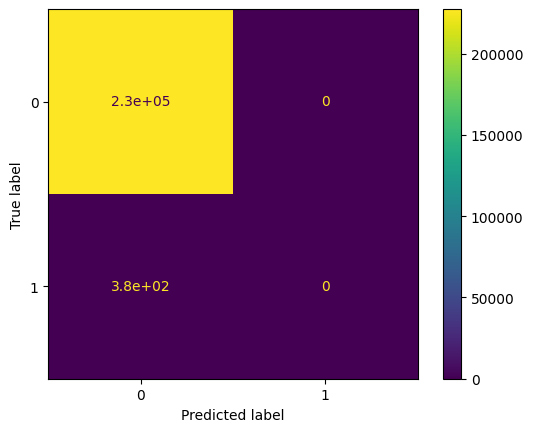

Confusion Matrix on Test set:


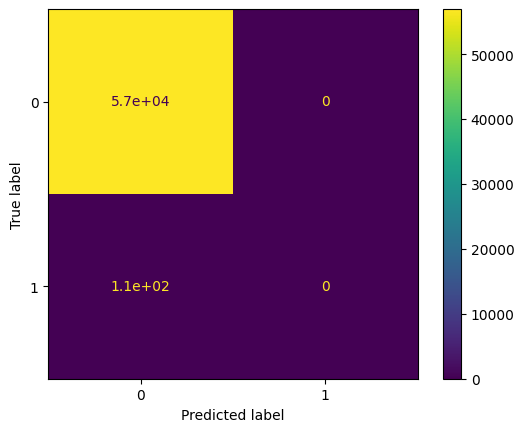

Current model:  Decision Tree


Accuracy on Train:  0.9994511911347611
Accuracy on Test:  0.9992812187724619


Precision on Train:  0.9996614074894904
Precision on Test:  0.9995258582843094


Recall on Train:  0.9997889024245437
Recall on Test:  0.9997540926017002


F1-score on Train:  0.9994404111714443
F1-score on Test:  0.9992584691755807


Confusion Matrix on Train set:


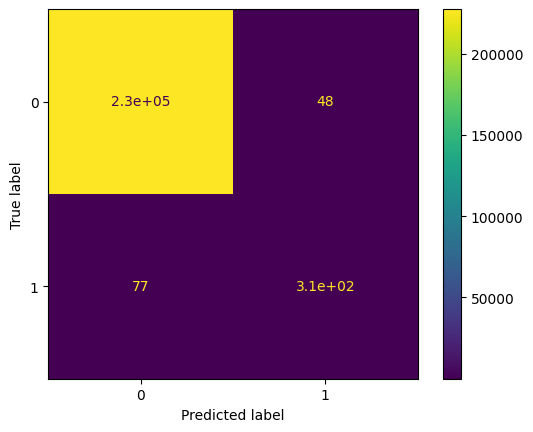

Confusion Matrix on Test set:


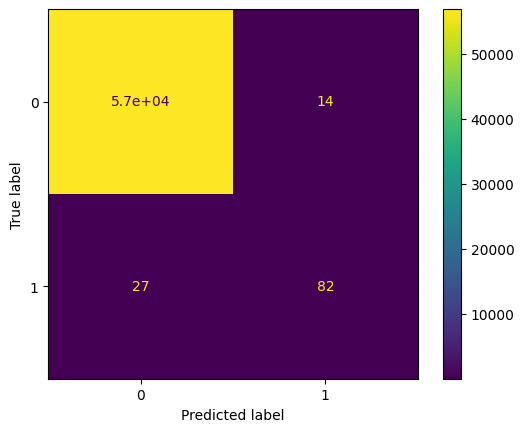

Current model:  Random Forest


Accuracy on Train:  0.9994160673673859
Accuracy on Test:  0.999298750021914


Precision on Train:  0.9995954870423948
Precision on Test:  0.9994907813871817


Recall on Train:  0.999819687487631
Recall on Test:  0.9998067870441931


F1-score on Train:  0.9993952745370335
F1-score on Test:  0.9992672491921044


Confusion Matrix on Train set:


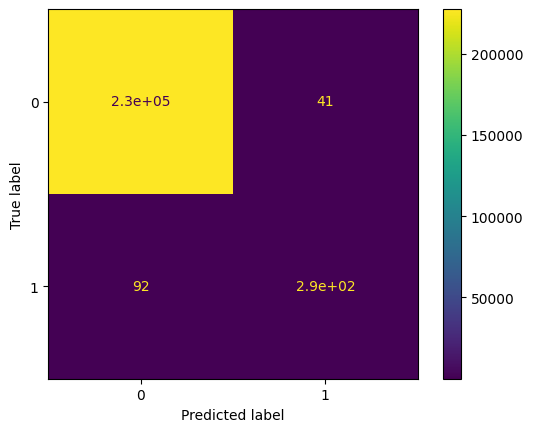

Confusion Matrix on Test set:


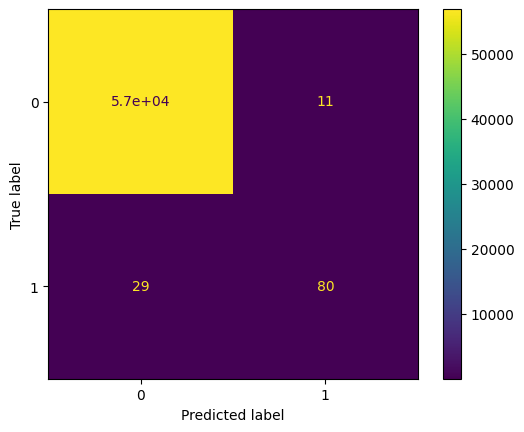

Current model:  Gradient-Boosted Tree


Accuracy on Train:  0.9996663242099347
Accuracy on Test:  0.9994214687680791


Precision on Train:  0.9997273898457114
Precision on Test:  0.9995785554989727


Recall on Train:  0.9999384298738252
Recall on Test:  0.9998419166725216


F1-score on Train:  0.9996551883093108
F1-score on Test:  0.9994001325631876


Confusion Matrix on Train set:


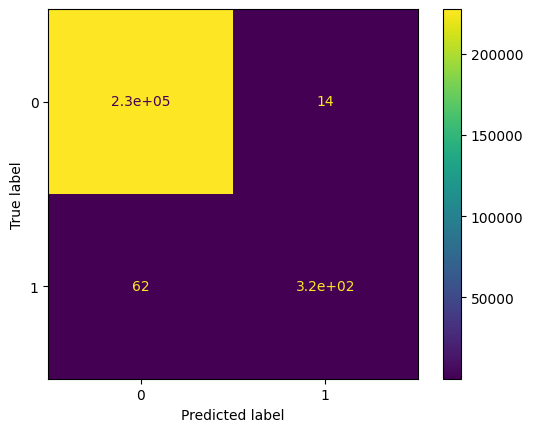

Confusion Matrix on Test set:


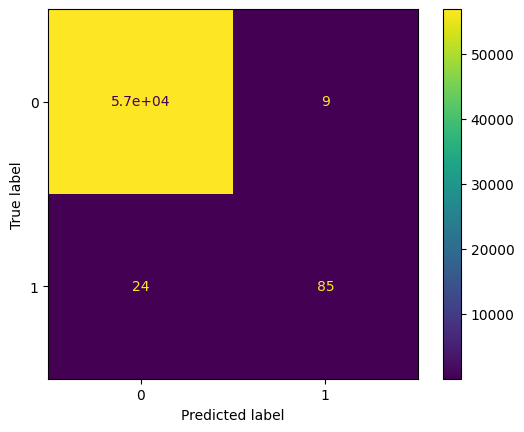

Current model:  Linear Support Vector Machines


Accuracy on Train:  0.9993721626581668
Accuracy on Test:  0.9993338125208183


Precision on Train:  0.9996262257596412
Precision on Test:  0.9995609721831975


Recall on Train:  0.9997449237629902
Recall on Test:  0.9997716574158645


F1-score on Train:  0.9993607120064036
F1-score on Test:  0.9993144441026857


Confusion Matrix on Train set:


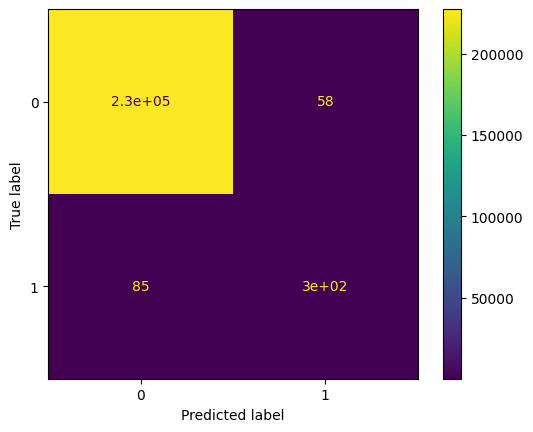

Confusion Matrix on Test set:


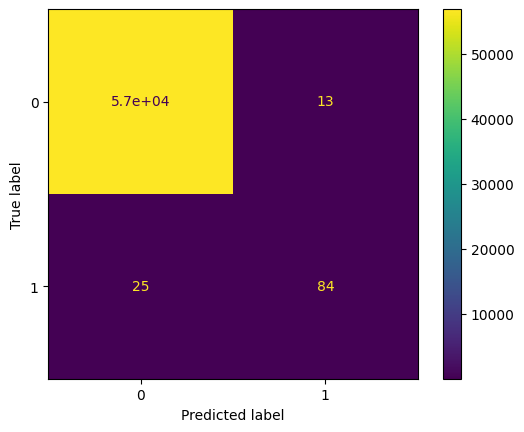

In [43]:
from pyspark.sql.types import StringType, BooleanType, IntegerType, FloatType, DateType, DoubleType
from sklearn.metrics import ConfusionMatrixDisplay
np.set_printoptions(suppress=True)

# instantiate Models

# regression
lr = LogisticRegression(
    featuresCol='features',
    labelCol='Class',
    predictionCol='Class_Prediction',
    maxIter=10,
    regParam=0.3,
    elasticNetParam=0.8
)

# decison tree
dt = DecisionTreeClassifier(featuresCol='features',
    labelCol='Class',
    predictionCol='Class_Prediction'
)

# random forest
rf = RandomForestClassifier(
    featuresCol='features',
    labelCol='Class',
    predictionCol='Class_Prediction'
)

# gradient - boosted tree
gbt = GBTClassifier(
    featuresCol='features',
    labelCol='Class',
    predictionCol='Class_Prediction'
)

# linear support vector machines
lsvc = LinearSVC(
    featuresCol='features',
    labelCol='Class',
    predictionCol='Class_Prediction'
)

# naive bayes
#nb = NaiveBayes(
    #featuresCol='features',
    #labelCol='Class',
    #predictionCol='Class_Prediction'
    #smoothing=1.0, 
    #modelType="multinomial"
#)




# create list of models
list_of_models = [lr, dt, rf, gbt, lsvc]
list_of_model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Gradient-Boosted Tree', 'Linear Support Vector Machines']

# go through list
for model, model_name in zip(list_of_models, list_of_model_names):

    # print current model
    print('Current model: ', model_name)

    # create a pipeline object
    pipeline = Pipeline(stages=[model])

    # fit pipeline
    pipeline_model = pipeline.fit(train_vec)

    # get scores on the training set
    train_pred = pipeline_model.transform(train_vec)

    # get scores on the test set
    test_pred = pipeline_model.transform(test_vec)

    # get accuracy on train and test set
    accuracy_evaluator = MulticlassClassificationEvaluator(predictionCol='Class_Prediction', labelCol='Class', metricName='accuracy')
    accuracy_score_train = accuracy_evaluator.evaluate(train_pred)
    accuracy_score_test = accuracy_evaluator.evaluate(test_pred)
    print('Accuracy on Train: ', accuracy_score_train)
    print('Accuracy on Test: ', accuracy_score_test)

    # get precision on train and test set
    precision_evaluator = MulticlassClassificationEvaluator(predictionCol='Class_Prediction', labelCol='Class', metricName='precisionByLabel')
    precision_score_train = precision_evaluator.evaluate(train_pred)
    precision_score_test = precision_evaluator.evaluate(test_pred)
    print('Precision on Train: ', precision_score_train)
    print('Precision on Test: ', precision_score_test)

    # get recall on train and test set
    recall_evaluator = MulticlassClassificationEvaluator(predictionCol='Class_Prediction', labelCol='Class', metricName='recallByLabel')
    recall_score_train = recall_evaluator.evaluate(train_pred)
    recall_score_test = recall_evaluator.evaluate(test_pred)
    print('Recall on Train: ', recall_score_train)
    print('Recall on Test: ', recall_score_test)

    # get f1-score on train and test set
    f1_evaluator = MulticlassClassificationEvaluator(predictionCol='Class_Prediction', labelCol='Class', metricName='f1')
    f1_score_train = f1_evaluator.evaluate(train_pred)
    f1_score_test = f1_evaluator.evaluate(test_pred)
    print('F1-score on Train: ', f1_score_train)
    print('F1-score on Test: ', f1_score_test)

    # get confusion matrix on train set
    preds_and_labels_train = train_pred.withColumn("Class_Prediction", train_pred["Class_Prediction"].cast(DoubleType())).withColumn("Class", train_pred["Class"].cast(DoubleType()))
    preds_and_labels_train = preds_and_labels_train.select(['Class_Prediction', 'Class'])
    metrics_train = MulticlassMetrics(preds_and_labels_train.rdd)
    cm_arr_train = metrics_train.confusionMatrix().toArray().astype(float)
    cm_disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_arr_train)
    print('Confusion Matrix on Train set:')
    cm_disp_train.plot()
    plt.show()

    # get confusion matrix on test set
    preds_and_labels_test = test_pred.withColumn("Class_Prediction", test_pred["Class_Prediction"].cast(DoubleType())).withColumn("Class", test_pred["Class"].cast(DoubleType()))
    preds_and_labels_test = preds_and_labels_test.select(['Class_Prediction', 'Class'])
    metrics_test = MulticlassMetrics(preds_and_labels_test.rdd)
    cm_arr_test = metrics_test.confusionMatrix().toArray().astype(float)
    cm_disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_arr_test)
    print('Confusion Matrix on Test set:')
    cm_disp_test.plot()
    plt.show()


    

#### Conclusions: Imbalanced dataset
As expected when working with an imbalanced, binary-targeted dataset, the predictions have excellent values for every metric. This happens because, in this particular case, 99% of records have a value of '0 - not fraud', which means that the model is basically training to predict 0s most of the time. Since the train and test scores have similar values, we can infere that overfitting is not occuring.

### Working with the balanced dataset

First we have to balance the data set. Here we use a random undersampling approach

In [44]:
# balancing the dataset

# select fraud and non-fraud transactions and limit non-fraud transactions to the same number as fraud transactions
fraud_data = data.filter(f.col('Class') == 1)
non_fraud_data = data.filter(f.col('Class') == 0).limit(fraud_data.count())

# Combine fraud and non-fraud transactions and shuffle the data
balanced_data = fraud_data.union(non_fraud_data).orderBy(f.rand())

# Show 5 rows of the shuffled, balanced data
balanced_data.show(5)

+--------+-----------------+-----------------+------------------+-----------------+-------------------+------------------+-----------------+-------------------+------------------+------------------+-----------------+-----------------+-------------------+------------------+-------------------+------------------+-----------------+-----------------+------------------+------------------+-------------------+------------------+-------------------+-----------------+------------------+-------------------+-------------------+-------------------+------+-----+
|    Time|               V1|               V2|                V3|               V4|                 V5|                V6|               V7|                 V8|                V9|               V10|              V11|              V12|                V13|               V14|                V15|               V16|              V17|              V18|               V19|               V20|                V21|               V22|                V23

In [45]:
# build a data split: 80/20
balanced_train, balanced_test = balanced_data.randomSplit(weights=[0.8, 0.2], seed=42)
print('Train shape: ', (balanced_train.count(), len(balanced_train.columns)))
print('Test shape: ', (balanced_test.count(), len(balanced_test.columns)))

Train shape:  (825, 31)


Test shape:  (159, 31)


In [46]:
# get feature columns names
balanced_feature_columns = [col for col in balanced_data.columns if col!= 'Class']
print(balanced_feature_columns)
print(len(balanced_feature_columns))

['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']
30


In [47]:
# vectorize
balanced_vectorizer = VectorAssembler(inputCols=balanced_feature_columns, outputCol="features")
balanced_train_vec = vectorizer.transform(balanced_train)
balanced_test_vec = vectorizer.transform(balanced_test)

Current model:  Logistic Regression


Accuracy on Train:  0.9551515151515152
Accuracy on Test:  0.9245283018867925


Precision on Train:  0.918859649122807
Precision on Test:  0.8588235294117647


Recall on Train:  1.0
Recall on Test:  1.0


F1-score on Train:  0.9550291635246474
F1-score on Test:  0.9245641270599474


Confusion Matrix on Train set:


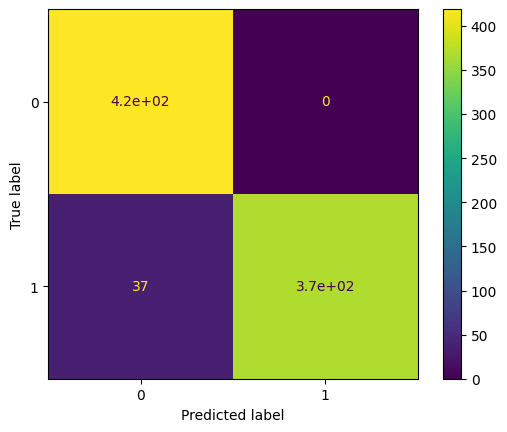

Confusion Matrix on Test set:


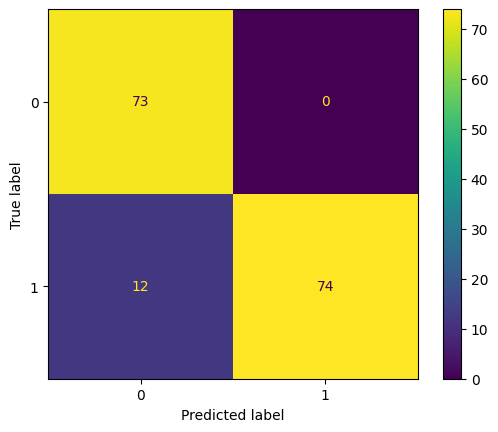

Current model:  Decision Tree


Accuracy on Train:  1.0
Accuracy on Test:  1.0


Precision on Train:  1.0
Precision on Test:  1.0


Recall on Train:  1.0
Recall on Test:  1.0


F1-score on Train:  1.0
F1-score on Test:  1.0


Confusion Matrix on Train set:


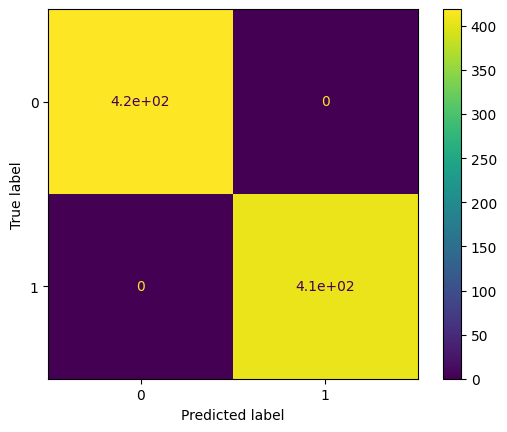

Confusion Matrix on Test set:


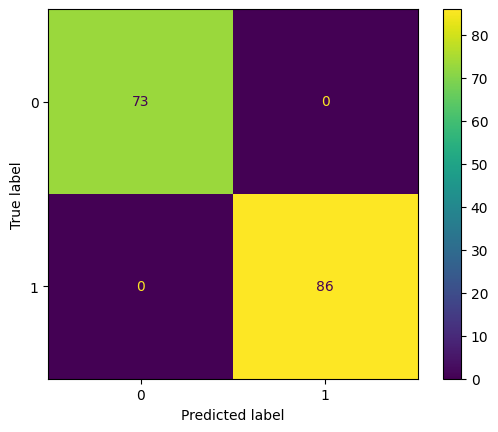

Current model:  Random Forest


Accuracy on Train:  1.0
Accuracy on Test:  1.0


Precision on Train:  1.0
Precision on Test:  1.0


Recall on Train:  1.0
Recall on Test:  1.0


F1-score on Train:  1.0
F1-score on Test:  1.0


Confusion Matrix on Train set:


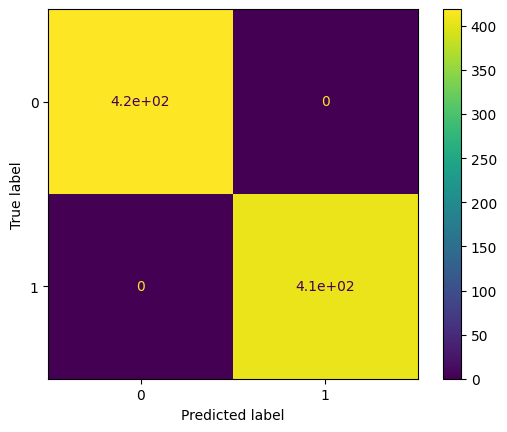

Confusion Matrix on Test set:


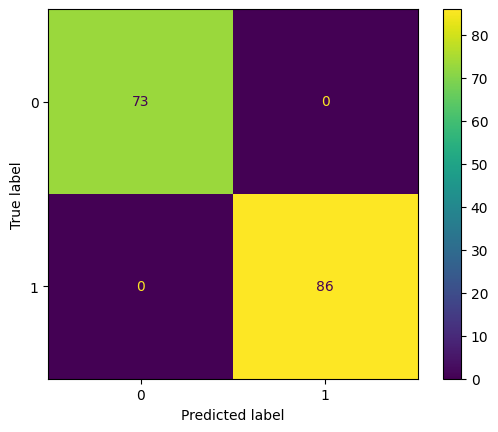

Current model:  Gradient-Boosted Tree


Accuracy on Train:  1.0
Accuracy on Test:  1.0


Precision on Train:  1.0
Precision on Test:  1.0


Recall on Train:  1.0
Recall on Test:  1.0


F1-score on Train:  1.0
F1-score on Test:  1.0


Confusion Matrix on Train set:


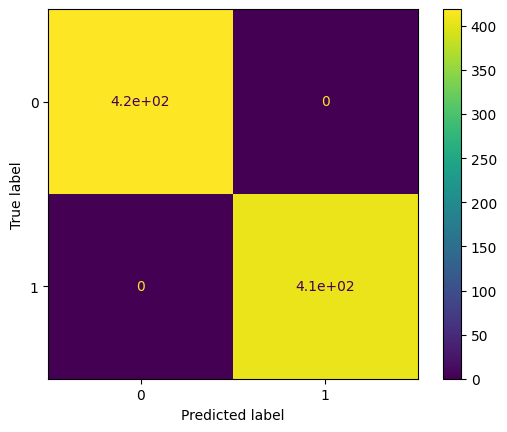

Confusion Matrix on Test set:


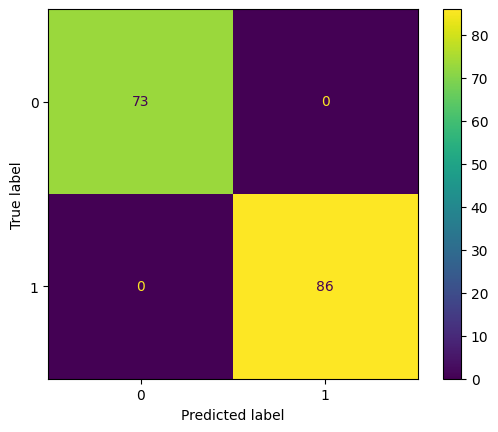

Current model:  Linear Support Vector Machines


Accuracy on Train:  1.0
Accuracy on Test:  0.9874213836477987


Precision on Train:  1.0
Precision on Test:  0.9733333333333334


Recall on Train:  1.0
Recall on Test:  1.0


F1-score on Train:  1.0
F1-score on Test:  0.9874323824379319


Confusion Matrix on Train set:


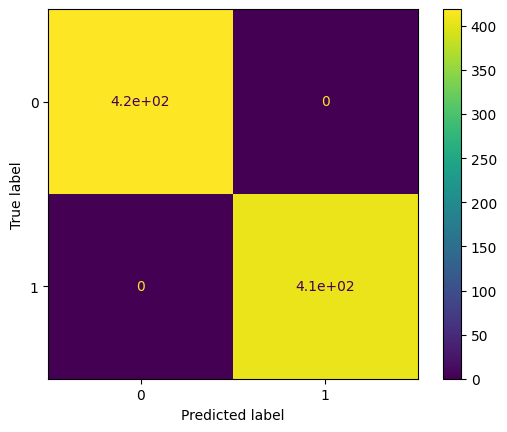

Confusion Matrix on Test set:


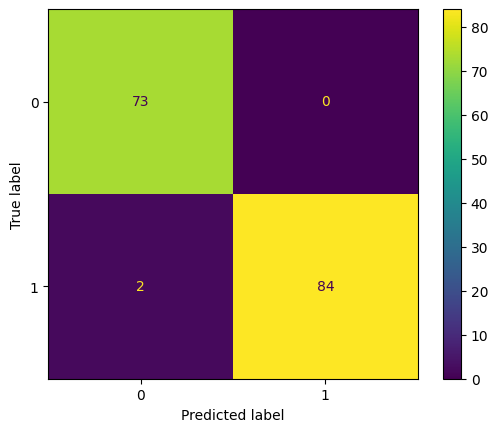

23/04/30 22:53:58 WARN HeartbeatReceiver: Removing executor driver with no recent heartbeats: 940395 ms exceeds timeout 120000 ms
23/04/30 22:53:58 WARN SparkContext: Killing executors is not supported by current scheduler.
23/04/30 22:54:03 WARN Executor: Issue communicating with driver in heartbeater
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:301)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEndpointRef.askSync(RpcEndpointRef.scala:103)
	at org.apache.spark.rpc.RpcEndpointRef.askSync(RpcEndpointRef.scala:87)
	at org.apache.spark.storage.BlockManagerMaster.registerBlockManager(BlockManagerMaster.scala:80)
	at org.apache.spark.storage.BlockManager.reregister(BlockManager.scala:643)
	at org.apache.spark.executor.Executor.reportHeartBeat(Executor.scala:1057)
	at org.apache.spark.executor.Executor.$anonfun$heartbeater$1(Executor.scala:238)
	at sc

----------------------------------------
Exception occurred during processing of request from ('127.0.0.1', 49446)
Traceback (most recent call last):
  File "/opt/anaconda3/envs/code/lib/python3.10/socketserver.py", line 316, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/opt/anaconda3/envs/code/lib/python3.10/socketserver.py", line 347, in process_request
    self.finish_request(request, client_address)
  File "/opt/anaconda3/envs/code/lib/python3.10/socketserver.py", line 360, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/opt/anaconda3/envs/code/lib/python3.10/socketserver.py", line 747, in __init__
    self.handle()
  File "/opt/anaconda3/envs/code/lib/python3.10/site-packages/pyspark/accumulators.py", line 281, in handle
    poll(accum_updates)
  File "/opt/anaconda3/envs/code/lib/python3.10/site-packages/pyspark/accumulators.py", line 253, in poll
    if func():
  File "/opt/anaconda3/envs/code/lib/pyt

In [48]:
# instantiate Models

# regression
balanced_lr = LogisticRegression(
    featuresCol='features',
    labelCol='Class',
    predictionCol='Class_Prediction',
    maxIter=10,
    regParam=0.3,
    elasticNetParam=0.8
)

# decison tree
balanced_dt = DecisionTreeClassifier(featuresCol='features',
    labelCol='Class',
    predictionCol='Class_Prediction'
)

# random forest
balanced_rf = RandomForestClassifier(
    featuresCol='features',
    labelCol='Class',
    predictionCol='Class_Prediction'
)

# gradient - boosted tree
balanced_gbt = GBTClassifier(
    featuresCol='features',
    labelCol='Class',
    predictionCol='Class_Prediction'
)

# linear support vector machines
balanced_lsvc = LinearSVC(
    featuresCol='features',
    labelCol='Class',
    predictionCol='Class_Prediction'
)

# naive bayes
#balanced_nb = NaiveBayes(
    #featuresCol='features',
    #labelCol='Class',
    #predictionCol='Class_Prediction'
    #smoothing=1.0, 
    #modelType="multinomial"
#)




# create list of models
balanced_list_of_models = [balanced_lr, balanced_dt, balanced_rf, balanced_gbt, balanced_lsvc]
balanced_list_of_model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Gradient-Boosted Tree', 'Linear Support Vector Machines']

# go through list
for balanced_model, balanced_model_name in zip(balanced_list_of_models, balanced_list_of_model_names):

    # print current model
    print('Current model: ', balanced_model_name)

    # create a pipeline object
    balanced_pipeline = Pipeline(stages=[balanced_model])

    # fit pipeline
    balanced_pipeline_model = balanced_pipeline.fit(balanced_train_vec)

    # get scores on the training set
    balanced_train_pred = balanced_pipeline_model.transform(balanced_train_vec)

    # get scores on the test set
    balanced_test_pred = balanced_pipeline_model.transform(balanced_test_vec)

    # get accuracy on train and test set
    balanced_accuracy_evaluator = MulticlassClassificationEvaluator(predictionCol='Class_Prediction', labelCol='Class', metricName='accuracy')
    balanced_accuracy_score_train = balanced_accuracy_evaluator.evaluate(balanced_train_pred)
    balanced_accuracy_score_test = balanced_accuracy_evaluator.evaluate(balanced_test_pred)
    print('Accuracy on Train: ', balanced_accuracy_score_train)
    print('Accuracy on Test: ', balanced_accuracy_score_test)

    # get precision on train and test set
    balanced_precision_evaluator = MulticlassClassificationEvaluator(predictionCol='Class_Prediction', labelCol='Class', metricName='precisionByLabel')
    balanced_precision_score_train = balanced_precision_evaluator.evaluate(balanced_train_pred)
    balanced_precision_score_test = balanced_precision_evaluator.evaluate(balanced_test_pred)
    print('Precision on Train: ', balanced_precision_score_train)
    print('Precision on Test: ', balanced_precision_score_test)

    # get recall on train and test set
    balanced_recall_evaluator = MulticlassClassificationEvaluator(predictionCol='Class_Prediction', labelCol='Class', metricName='recallByLabel')
    balanced_recall_score_train = balanced_recall_evaluator.evaluate(balanced_train_pred)
    balanced_recall_score_test = balanced_recall_evaluator.evaluate(balanced_test_pred)
    print('Recall on Train: ', balanced_recall_score_train)
    print('Recall on Test: ', balanced_recall_score_test)

    # get f1-score on train and test set
    balanced_f1_evaluator = MulticlassClassificationEvaluator(predictionCol='Class_Prediction', labelCol='Class', metricName='f1')
    balanced_f1_score_train = balanced_f1_evaluator.evaluate(balanced_train_pred)
    balanced_f1_score_test = balanced_f1_evaluator.evaluate(balanced_test_pred)
    print('F1-score on Train: ', balanced_f1_score_train)
    print('F1-score on Test: ', balanced_f1_score_test)

    # get confusion matrix on train set
    balanced_preds_and_labels_train = balanced_train_pred.withColumn("Class_Prediction", balanced_train_pred["Class_Prediction"].cast(DoubleType())).withColumn("Class", balanced_train_pred["Class"].cast(DoubleType()))
    balanced_preds_and_labels_train = balanced_preds_and_labels_train.select(['Class_Prediction', 'Class'])
    balanced_metrics_train = MulticlassMetrics(balanced_preds_and_labels_train.rdd)
    balanced_cm_arr_train = balanced_metrics_train.confusionMatrix().toArray().astype(float)
    balanced_cm_disp_train = ConfusionMatrixDisplay(confusion_matrix=balanced_cm_arr_train)
    print('Confusion Matrix on Train set:')
    balanced_cm_disp_train.plot()
    plt.show()

    # get confusion matrix on test set
    balanced_preds_and_labels_test = balanced_test_pred.withColumn("Class_Prediction", balanced_test_pred["Class_Prediction"].cast(DoubleType())).withColumn("Class", balanced_test_pred["Class"].cast(DoubleType()))
    balanced_preds_and_labels_test = balanced_preds_and_labels_test.select(['Class_Prediction', 'Class'])
    balanced_metrics_test = MulticlassMetrics(balanced_preds_and_labels_test.rdd)
    balanced_cm_arr_test = balanced_metrics_test.confusionMatrix().toArray().astype(float)
    balanced_cm_disp_test = ConfusionMatrixDisplay(confusion_matrix=balanced_cm_arr_test)
    print('Confusion Matrix on Test set:')
    balanced_cm_disp_test.plot()
    plt.show()


#### Conclusions: Balanced dataset
We can see that, for Logistic Regression, the scores for Accuracy, Precision and F1 decreased  for both the train and test sets. Furthermore, when looking at the results for the Decision Trees, Random Forest and Gradient-Bosted Trees, the values were better, since we achieved the value of '1' for every metric. Finally, for Linear Support Vector Machines, every metric for the train set achieved a value of 1, whilst the metrics for the test set varied a little, but still achieving significant high scores (with the exception of the Recall metric, which achieved a value of 1 for both the train and test set). Overall, we arrived at the conclusion that the results - when working with the balanced dataset - were better.